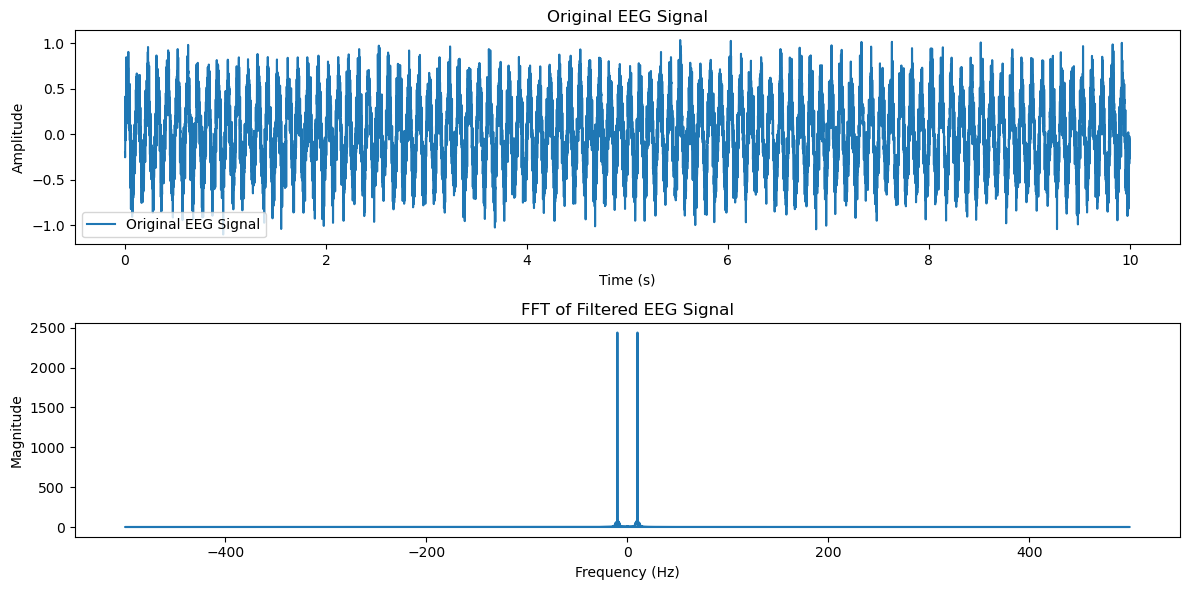

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import butter, lfilter

# Generate synthetic EEG data for demonstration purposes
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 10, 1/fs)  # Time vector
f_signal = 10  # Frequency of the signal (Hz)
eeg_signal = 0.5 * np.sin(2 * np.pi * f_signal * t) + 0.2 * np.random.randn(len(t))

# Apply a simple bandpass filter to focus on a specific frequency range
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

lowcut = 8  # Lower cutoff frequency (Hz)
highcut = 12  # Upper cutoff frequency (Hz)
filtered_signal = butter_bandpass_filter(eeg_signal, lowcut, highcut, fs)

# Perform FFT on the filtered EEG signal
fft_result = fft(filtered_signal)
frequencies = np.fft.fftfreq(len(fft_result), d=1/fs)

# Plot the original EEG signal and its FFT
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, eeg_signal, label='Original EEG Signal')
plt.title('Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.title('FFT of Filtered EEG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()
